In [35]:
'''We will try to predict variable Churn using a logistic regression on variables tenure, 
SeniorCitizen,MonthlyCharges.

1. Extract the target variable.
2. Extract the independent variables and scale them.
3. Build the logistic regression model.
4. Evaluate the model.
5. Even a simple model will give us more than 70% accuracy. Why?

Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors 
that adds new points between existing points. 
6. Apply imblearn.over_sampling.SMOTE to the dataset. 
   - Build and evaluate the logistic regression model. 
   - Is it there any improvement?
Tomek links are pairs of very close instances, but of opposite classes. 
Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. 
7. Apply imblearn.under_sampling.TomekLinks to the dataset. 
  - Build and evaluate the logistic regression model. 
  - Is it there any improvement?'''

'We will try to predict variable Churn using a logistic regression on variables tenure, \nSeniorCitizen,MonthlyCharges.\n\n1. Extract the target variable.\n2. Extract the independent variables and scale them.\n3. Build the logistic regression model.\n4. Evaluate the model.\n5. Even a simple model will give us more than 70% accuracy. Why?\n5. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?\n6. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?'

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import collections 
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [3]:
data = pd.read_csv('/Users/claudia/Ironhack/Week4/Labs_solutions/lab-imbalanced-data-master/files_for_lab/customer_churn.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#1. Extract the target variable, which is data['Churn'].

y = pd.DataFrame(data['Churn'])

In [8]:
y.shape

(7043, 1)

In [9]:
type(y)

pandas.core.frame.DataFrame

In [10]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [11]:
def churn(text):
    n=0
    if 'Yes' in text:
        n= 1
    else:
        n= 0
    return n

y['Churn'] = y['Churn'].apply(churn)

In [12]:
y.dtypes

Churn    int64
dtype: object

In [13]:
#2. Extract the independent variables and scale them.
X = data[['tenure','SeniorCitizen','MonthlyCharges']]

In [14]:
X.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
dtype: object

In [15]:
X.corr()



,tenure,SeniorCitizen,MonthlyCharges
tenure,1.000000,0.016567,0.247900
SeniorCitizen,0.016567,1.000000,0.220173
MonthlyCharges,0.247900,0.220173,1.000000


In [16]:
#from sklearn.preprocessing import StandardScaler
#transformer = StandardScaler().fit(X)
#x_standardized = transformer.transform(X)
#print(x_standardized.shape) 

In [17]:
#x_standardized

In [18]:
y = y.to_numpy()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)
#scaled_x = StandardScaler().fit_transform(X)

In [20]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#3. Build the logistic regression model.

In [21]:
X_train

array([[-1.28288214, -0.43609145, -1.31004561],
       [-1.03785653, -0.43609145,  0.34483164],
       [-1.16036933, -0.43609145, -1.48433058],
       ...,
       [-0.83366851, -0.43609145, -1.44781373],
       [-0.83366851,  2.293097  ,  1.15152206],
       [-0.26194207, -0.43609145, -1.49262986]])

In [22]:
X_test

array([[-1.28288214, -0.43609145, -1.32664418],
       [ 0.35062198, -0.43609145, -1.31170547],
       [ 0.79983561, -0.43609145, -1.50756857],
       ...,
       [-0.13942926, -0.43609145,  0.20374381],
       [-1.24204454, -0.43609145, -0.99799253],
       [ 0.84067322,  2.293097  ,  0.30001551]])

In [25]:
type(X_test)

numpy.ndarray

In [27]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=42)

In [28]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(t_test),1)),1))
#print([x for x in zip(y_pred, y_test)])
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
m = accuracy_score(y_test, y_pred)
print('Our model has',round(m*100,2),' % of accuracy')

[[1187   95]
 [ 261  218]]
Our model has 79.78  % of accuracy


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1282
           1       0.70      0.46      0.55       479

    accuracy                           0.80      1761
   macro avg       0.76      0.69      0.71      1761
weighted avg       0.79      0.80      0.78      1761



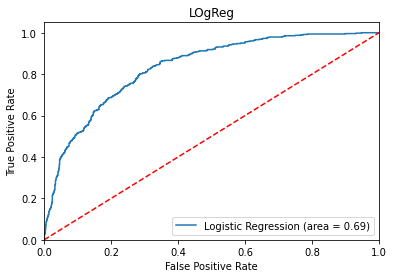

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LOgReg')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0.5, 257.44, 'Predicted label')

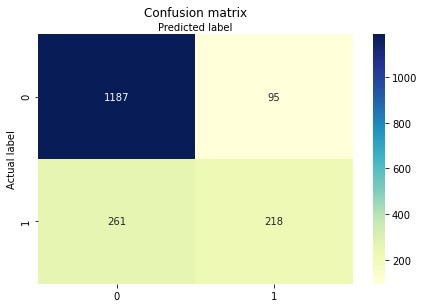

In [34]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')